# Décrivez et nettoyez votre jeu de données
## Télécharger les données

In [2]:
import pandas as pd

In [3]:
features = pd.read_csv('data/dengue_features_train.csv')
features.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [4]:
labels = pd.read_csv('data/dengue_labels_train.csv')
labels.head()

,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6


In [7]:
X = features.copy()
y = labels.copy()

## Traitement des dates

In [8]:
X['week_start_date']= pd.to_datetime(X['week_start_date'], format='%Y-%m-%d')
X['total_cases'] = y['total_cases']
#Split week_start_date
X["day"]= X.week_start_date.dt.day
X["month"]= X.week_start_date.dt.month
X.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases,day,month
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4,30,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5,7,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4,14,5
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3,21,5
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6,28,5


### Separation sj/iq

In [9]:
#Dataframe "sj" San Juan
X_sj = X[X['city']=='sj']
X_iq = X[X['city']=='iq']

## 4 types de variables

In [10]:
X.columns

Index(['city', 'year', 'weekofyear', 'week_start_date', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm', 'total_cases', 'day',
       'month'],
      dtype='object')

In [11]:
v_quant_disc =['total_cases']#__à verifier
v_quant_cont =[
    'ndvi_ne',
    'ndvi_nw',
    'ndvi_se',
    'ndvi_sw',
    'precipitation_amt_mm',
    'reanalysis_air_temp_k',
    'reanalysis_avg_temp_k',
    'reanalysis_dew_point_temp_k',
    'reanalysis_max_air_temp_k',
    'reanalysis_min_air_temp_k',
    'reanalysis_precip_amt_kg_per_m2',
    'reanalysis_relative_humidity_percent',
    'reanalysis_sat_precip_amt_mm',
    'reanalysis_specific_humidity_g_per_kg',
    'reanalysis_tdtr_k',
    'station_avg_temp_c',
    'station_diur_temp_rng_c',
    'station_max_temp_c',
    'station_min_temp_c',
    'station_precip_mm']

v_qual_nomi = ['city']
v_qual_ordi = [
    'year',
    'weekofyear', 
    'week_start_date',
    'day',
    'month']

## la distribution empirique des variables

In [12]:
import matplotlib.pyplot as plt

### Variable qualitative

In [5]:
#Nominale
#Diagamme en secteur
X['city'].value_counts(normalize=True).plot(kind='pie')
plt.axis('equal') # Cette ligne assure que le pie chart est un cercle plutôt qu'une éllipse
plt.show() # Affiche le graphique


# Diagramme en tuyaux d'orgues
X['city'].value_counts(normalize=True).plot(kind='bar')
plt.show()

NameError: name 'X' is not defined

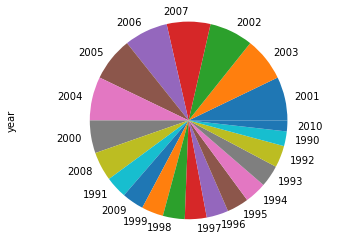

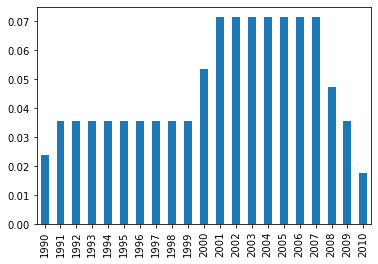

In [14]:
#Ordinale
#Diagamme en secteur
X['year'].value_counts(normalize=True).plot(kind='pie')
plt.axis('equal') # Cette ligne assure que le pie chart est un cercle plutôt qu'une éllipse
plt.show() # Affiche le graphique

# Diagramme en tuyaux d'orgues
X['year'].value_counts(normalize=True).sort_index(). plot(kind='bar')
plt.show()

Variable quantitative

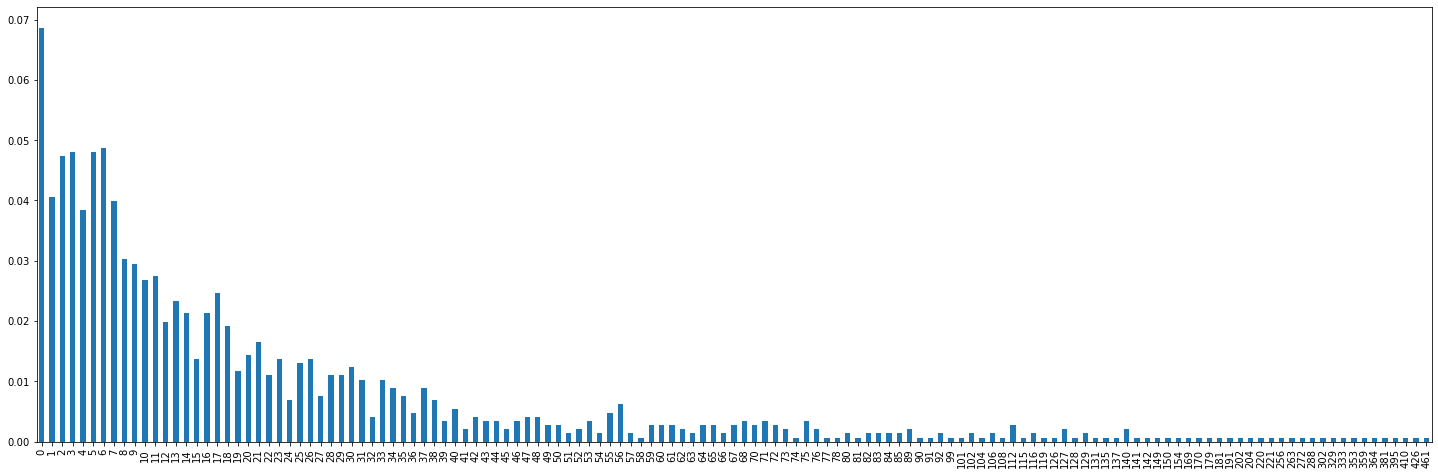

In [15]:
#Discrete
#Diagramme en bâtons
plt.figure(figsize=(25, 8))
X['total_cases'].value_counts(normalize=True).sort_index().plot(kind='bar')
plt.show()


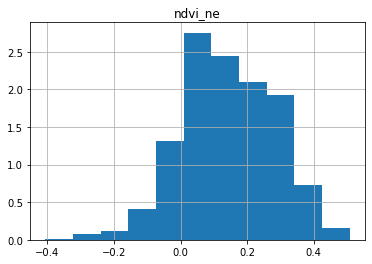

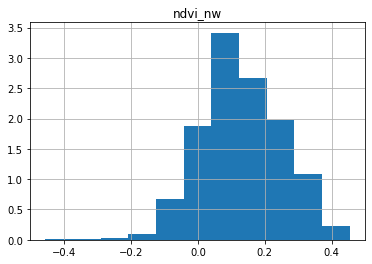

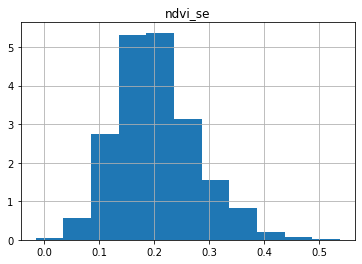

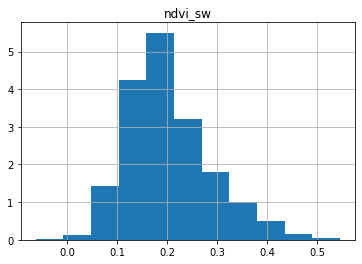

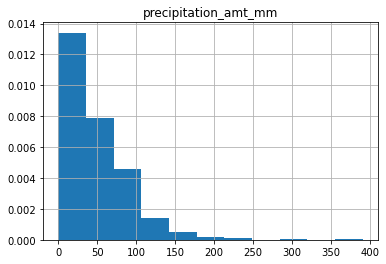

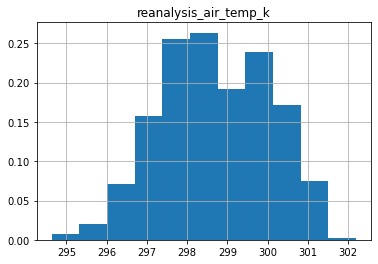

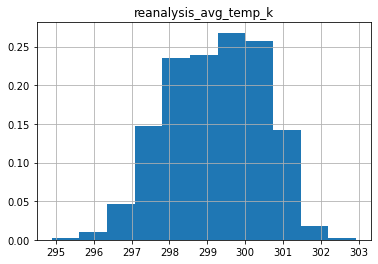

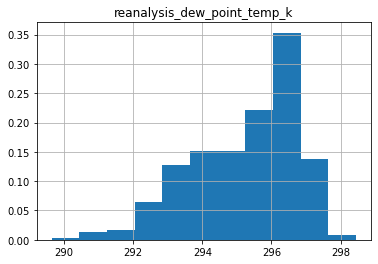

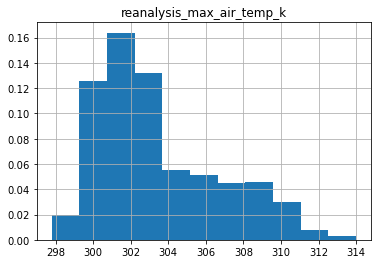

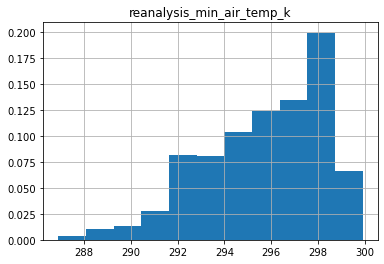

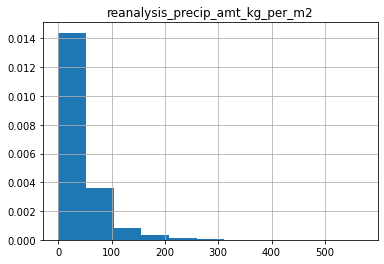

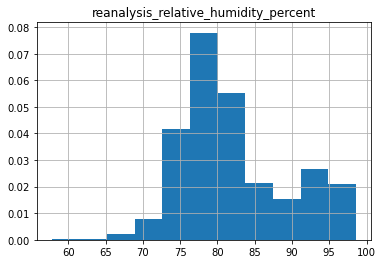

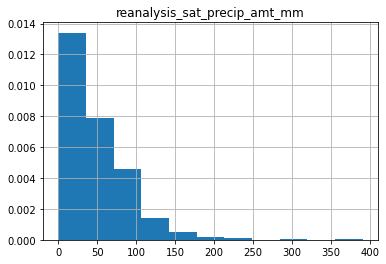

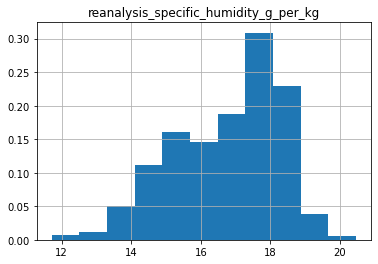

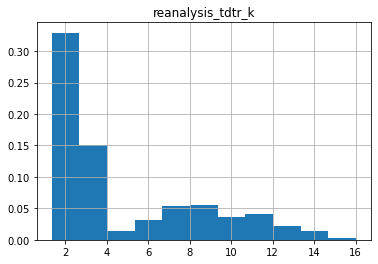

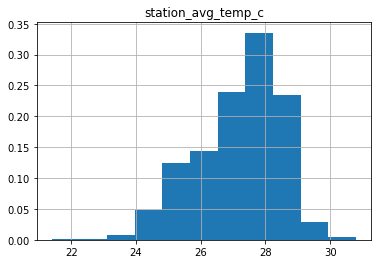

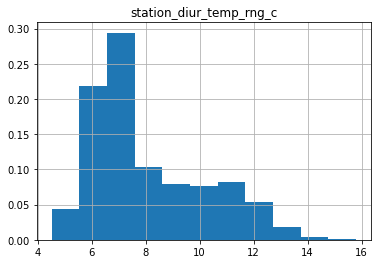

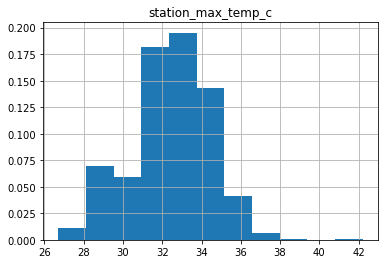

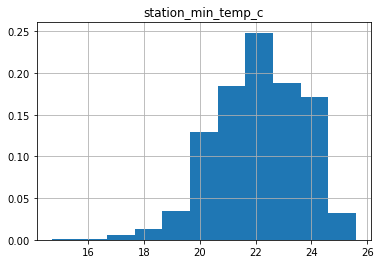

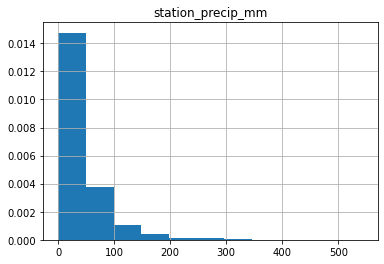

In [16]:
#Continue
#Histogramme
#Nombre de classe (règle de Sturges) k=[1+log2(n)]
from math import log2
k = int(1 + log2(X.shape[0]))
for var in v_quant_cont:
    X[var].hist(density=True,bins=k)
    plt.title(var)
    plt.show()

### Les variables sous forme de tableau

In [17]:
# Variables qualitatives nominale
effectifs = X['city'].value_counts()
modalites = effectifs.index # l'index de effectifs contient les modalités

tab = pd.DataFrame(modalites, columns = ['city']) # création du tableau à partir des modalités
tab["n"] = effectifs.values
tab["f"] = tab["n"] / len(X) # len(data) renvoie la taille de l'échantillon
tab["F"] = tab["f"].cumsum() # cumsum calcule la somme cumulée
tab

,city,n,f,F
0,sj,936,0.642857,0.642857
1,iq,520,0.357143,1.000000


In [18]:
# Variables qualitatives ordinale
effectifs = X['year'].value_counts()
modalites = effectifs.index # l'index de effectifs contient les modalités

tab = pd.DataFrame(modalites, columns = ['year']) # création du tableau à partir des modalités
tab["n"] = effectifs.values
tab["f"] = tab["n"] / len(X) # len(data) renvoie la taille de l'échantillon
tab = tab.sort_values('year') # tri des valeurs de la variable X (croissant)
tab["F"] = tab["f"].cumsum() # cumsum calcule la somme cumulée
tab


,year,n,f,F
19,1990,35,0.024038,0.024038
9,1991,52,0.035714,0.059753
18,1992,52,0.035714,0.095467
17,1993,52,0.035714,0.131181
16,1994,52,0.035714,0.166896
15,1995,52,0.035714,0.202610
14,1996,52,0.035714,0.238324
13,1997,52,0.035714,0.274038
12,1998,52,0.035714,0.309753
11,1999,52,0.035714,0.345467


In [19]:
#Variable quatitative continue (Classe)

for var in v_quant_cont:
    effectifs = X[var].value_counts()
    modalites = effectifs.index # l'index de effectifs contient les modalités

    tab = pd.DataFrame(modalites, columns = [var]) # création du tableau à partir des modalités
    tab["n"] = effectifs.values
    tab["f"] = tab["n"] / len(X) # len(data) renvoie la taille de l'échantillon
    tab = tab.sort_values(var) # tri des valeurs de la variable X (croissant)
    tab["F"] = tab["f"].cumsum() # cumsum calcule la somme cumulée
    print(tab)

       ndvi_ne  n         f         F
1213 -0.406250  1  0.000687  0.000687
741  -0.321400  1  0.000687  0.001374
95   -0.308400  1  0.000687  0.002060
643  -0.290200  1  0.000687  0.002747
796  -0.287000  1  0.000687  0.003434
...        ... ..       ...       ...
921   0.488229  1  0.000687  0.864011
222   0.488400  1  0.000687  0.864698
1118  0.493400  1  0.000687  0.865385
636   0.501029  1  0.000687  0.866071
1069  0.508357  1  0.000687  0.866758

[1214 rows x 4 columns]
       ndvi_nw  n         f         F
822  -0.456100  1  0.000687  0.000687
177  -0.309600  1  0.000687  0.001374
259  -0.252800  1  0.000687  0.002060
554  -0.249800  1  0.000687  0.002747
894  -0.215300  1  0.000687  0.003434
...        ... ..       ...       ...
400   0.428771  1  0.000687  0.961538
617   0.433014  1  0.000687  0.962225
1162  0.437100  1  0.000687  0.962912
654   0.445000  1  0.000687  0.963599
864   0.454429  1  0.000687  0.964286

[1365 rows x 4 columns]
       ndvi_se  n         f         F


In [20]:
#Variable quatitative discrete
effectifs = X['total_cases'].value_counts()
modalites = effectifs.index # l'index de effectifs contient les modalités

tab = pd.DataFrame(modalites, columns = ['total_cases']) # création du tableau à partir des modalités
tab["n"] = effectifs.values
tab["f"] = tab["n"] / len(X) # len(data) renvoie la taille de l'échantillon
tab = tab.sort_values('total_cases') # tri des valeurs de la variable X (croissant)
tab["F"] = tab["f"].cumsum() # cumsum calcule la somme cumulée
tab

,total_cases,n,f,F
0,0,100,0.068681,0.068681
5,1,59,0.040522,0.109203
4,2,69,0.047390,0.156593
2,3,70,0.048077,0.204670
7,4,56,0.038462,0.243132
...,...,...,...,...
107,381,1,0.000687,0.997253
108,395,1,0.000687,0.997940
109,410,1,0.000687,0.998626
115,426,1,0.000687,0.999313


### Indicateur de tendance centrale (Moyenne, Mediane, Mode)

In [21]:
X[v_quant_cont].mean()

ndvi_ne                                    0.142294
ndvi_nw                                    0.130553
ndvi_se                                    0.203783
ndvi_sw                                    0.202305
precipitation_amt_mm                      45.760388
reanalysis_air_temp_k                    298.701852
reanalysis_avg_temp_k                    299.225578
reanalysis_dew_point_temp_k              295.246356
reanalysis_max_air_temp_k                303.427109
reanalysis_min_air_temp_k                295.719156
reanalysis_precip_amt_kg_per_m2           40.151819
reanalysis_relative_humidity_percent      82.161959
reanalysis_sat_precip_amt_mm              45.760388
reanalysis_specific_humidity_g_per_kg     16.746427
reanalysis_tdtr_k                          4.903754
station_avg_temp_c                        27.185783
station_diur_temp_rng_c                    8.059328
station_max_temp_c                        32.452437
station_min_temp_c                        22.102150
station_prec

In [22]:
X[v_quant_cont].median()

ndvi_ne                                    0.128817
ndvi_nw                                    0.121429
ndvi_se                                    0.196050
ndvi_sw                                    0.189450
precipitation_amt_mm                      38.340000
reanalysis_air_temp_k                    298.646429
reanalysis_avg_temp_k                    299.289286
reanalysis_dew_point_temp_k              295.640714
reanalysis_max_air_temp_k                302.400000
reanalysis_min_air_temp_k                296.200000
reanalysis_precip_amt_kg_per_m2           27.245000
reanalysis_relative_humidity_percent      80.301429
reanalysis_sat_precip_amt_mm              38.340000
reanalysis_specific_humidity_g_per_kg     17.087143
reanalysis_tdtr_k                          2.857143
station_avg_temp_c                        27.414286
station_diur_temp_rng_c                    7.300000
station_max_temp_c                        32.800000
station_min_temp_c                        22.200000
station_prec

In [23]:
X[v_quant_cont].mode() #distribution plurimodale (plusieur pics)

,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,0.0455,0.02780,0.088214,0.168871,0.0,299.885714,300.035714,295.871429,301.8,298.0,8.3,78.311429,0.0,17.704286,2.357143,27.4,6.185714,32.8,23.9,0.0
1,0.0802,0.07825,0.124657,0.188229,NaN,NaN,300.285714,296.295714,302.3,NaN,NaN,NaN,NaN,18.091429,NaN,28.0,NaN,NaN,NaN,NaN
2,0.0969,0.08460,0.134314,NaN,NaN,NaN,NaN,296.397143,NaN,NaN,NaN,NaN,NaN,18.484286,NaN,NaN,NaN,NaN,NaN,NaN
3,0.1194,0.11270,0.136929,NaN,NaN,NaN,NaN,296.642857,NaN,NaN,NaN,NaN,NaN,18.485714,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,0.137757,NaN,NaN,NaN,NaN,296.900000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,0.138743,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,0.140471,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,0.146343,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,0.146657,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,0.151500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
X[v_quant_disc].mean()

total_cases    24.675137
dtype: float64

In [25]:
X[v_quant_disc].median()

total_cases    12.0
dtype: float64

In [26]:
X[v_quant_disc].mode()

,total_cases
0,0


### les mesures de dispersion (La variance, L'écart-type)

--------------------
ndvi_ne
Moyenne:
 0.14229353741679882
Mediane:
 0.12881665
Mode:
 0.0455
Variance:
 0.01973335603080018
Ecart-type:
 0.14047546415940465


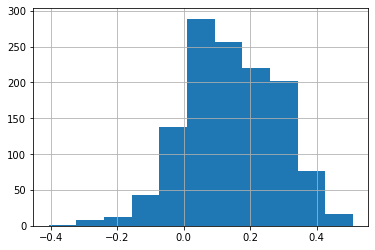

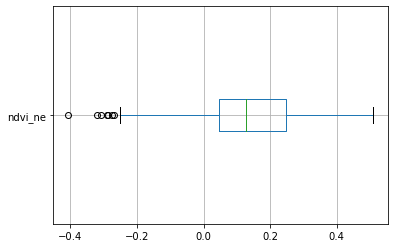

--------------------
ndvi_nw
Moyenne:
 0.13055257610470097
Mediane:
 0.1214286
Mode:
 0.0278
Variance:
 0.014389518793474707
Ecart-type:
 0.11995632035651438


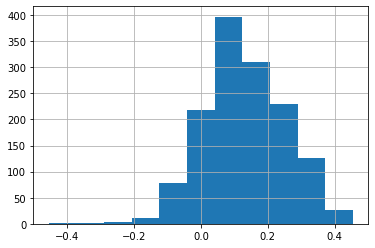

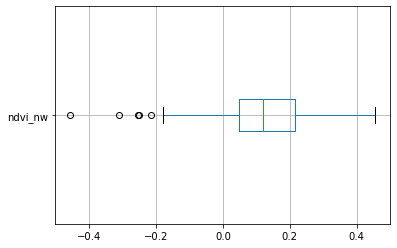

--------------------
ndvi_se
Moyenne:
 0.20378318902580198
Mediane:
 0.19605
Mode:
 0.08821429
Variance:
 0.0054514568248734425
Ecart-type:
 0.07383398150495098


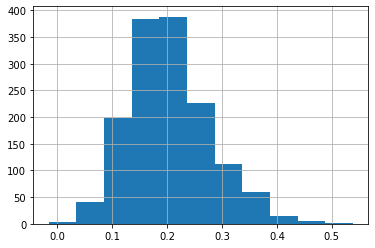

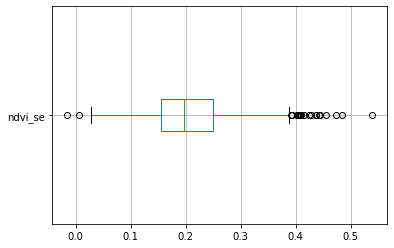

--------------------
ndvi_sw
Moyenne:
 0.2023054907112968
Mediane:
 0.18945
Mode:
 0.1688714
Variance:
 0.007034750233014991
Ecart-type:
 0.08387341791661403


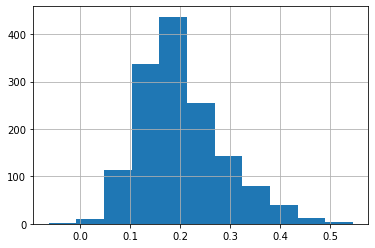

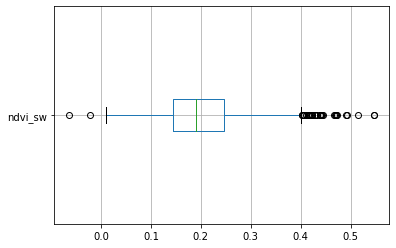

--------------------
precipitation_amt_mm
Moyenne:
 45.76038808038808
Mediane:
 38.34
Mode:
 0.0
Variance:
 1909.7238167586106
Ecart-type:
 43.70038691772203


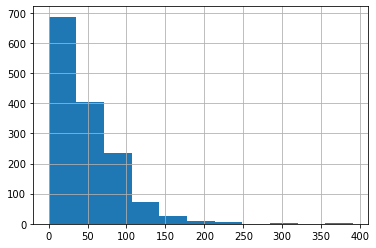

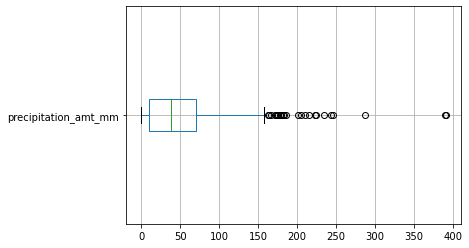

--------------------
reanalysis_air_temp_k
Moyenne:
 298.70185240072277
Mediane:
 298.6464285715
Mode:
 299.885714286
Variance:
 1.8549032993266052
Ecart-type:
 1.3619483467909512


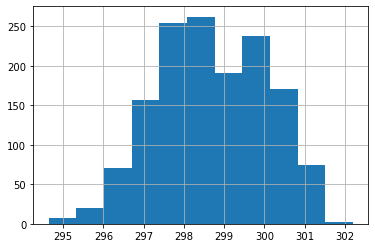

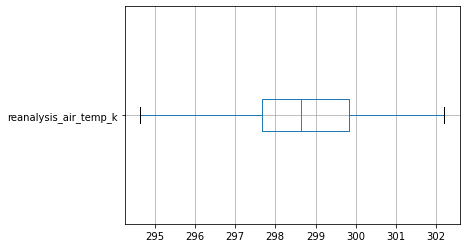

--------------------
reanalysis_avg_temp_k
Moyenne:
 299.2255779490293
Mediane:
 299.2892857145
Mode:
 300.035714286
Variance:
 1.5908245135727617
Ecart-type:
 1.2612789198162164


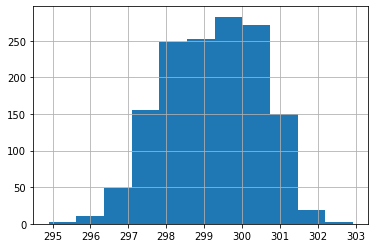

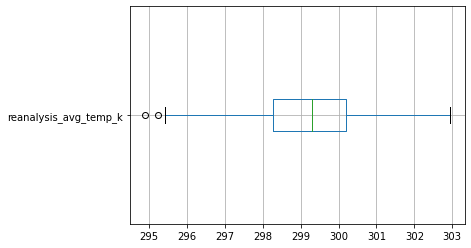

--------------------
reanalysis_dew_point_temp_k
Moyenne:
 295.2463564512937
Mediane:
 295.6407142855
Mode:
 295.87142857099997
Variance:
 2.3325886778495626
Ecart-type:
 1.5272814664787766


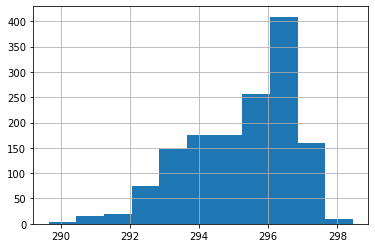

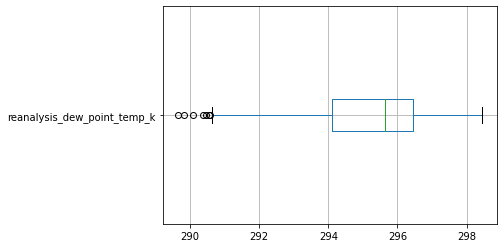

--------------------
reanalysis_max_air_temp_k
Moyenne:
 303.4271092669431
Mediane:
 302.4
Mode:
 301.8
Variance:
 10.455406166483966
Ecart-type:
 3.2334820498162604


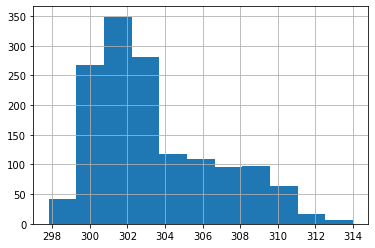

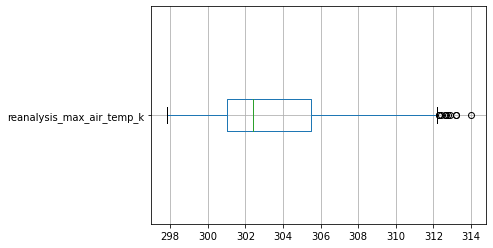

--------------------
reanalysis_min_air_temp_k
Moyenne:
 295.7191562932228
Mediane:
 296.2
Mode:
 298.0
Variance:
 6.576541750122904
Ecart-type:
 2.564476896000996


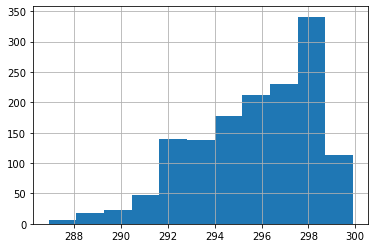

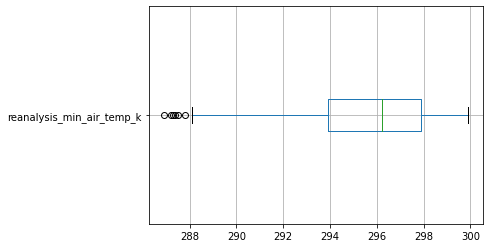

--------------------
reanalysis_precip_amt_kg_per_m2
Moyenne:
 40.15181881051176
Mediane:
 27.244999999999997
Mode:
 8.3
Variance:
 1885.242341574364
Ecart-type:
 43.419377489484624


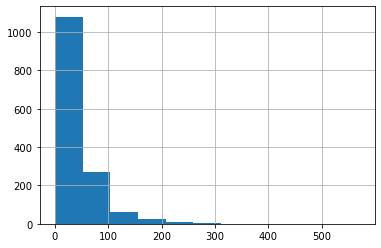

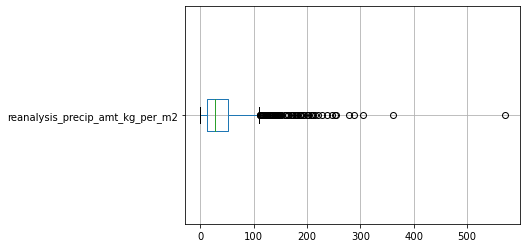

--------------------
reanalysis_relative_humidity_percent
Moyenne:
 82.16195909899109
Mediane:
 80.30142857145
Mode:
 78.3114285714
Variance:
 51.142854542542906
Ecart-type:
 7.151423252929651


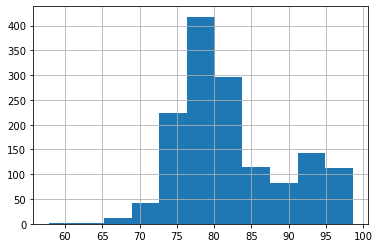

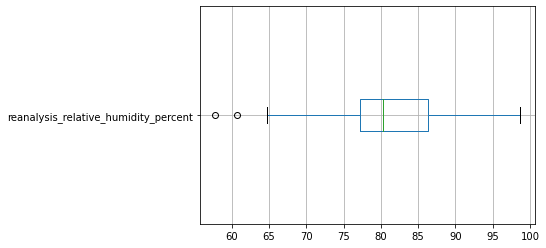

--------------------
reanalysis_sat_precip_amt_mm
Moyenne:
 45.76038808038808
Mediane:
 38.34
Mode:
 0.0
Variance:
 1909.7238167586106
Ecart-type:
 43.70038691772203


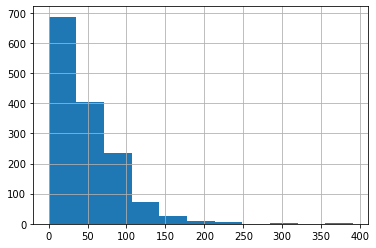

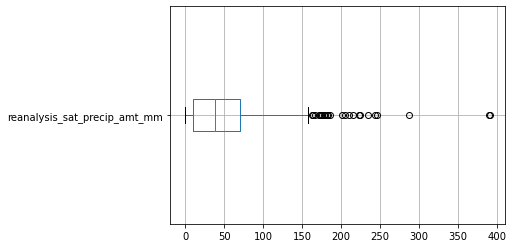

--------------------
reanalysis_specific_humidity_g_per_kg
Moyenne:
 16.746426595534537
Mediane:
 17.08714285715
Mode:
 17.7042857143
Variance:
 2.3776430991844215
Ecart-type:
 1.5419607969025741


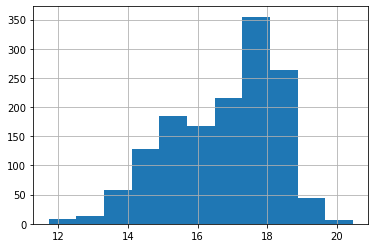

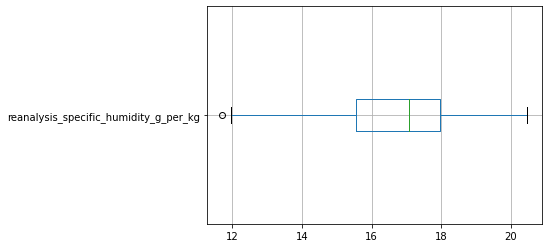

--------------------
reanalysis_tdtr_k
Moyenne:
 4.903754198774742
Mediane:
 2.85714285714
Mode:
 2.3571428571400004
Variance:
 12.568574835336992
Ecart-type:
 3.5452185878076676


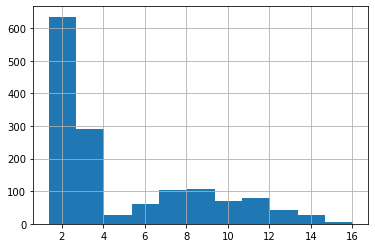

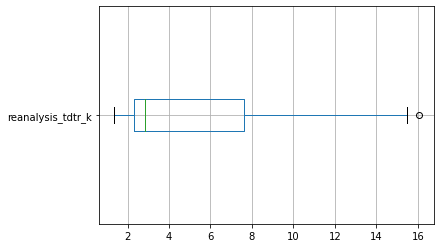

--------------------
station_avg_temp_c
Moyenne:
 27.18578337208989
Mediane:
 27.4142857143
Mode:
 27.4
Variance:
 1.6689799679628807
Ecart-type:
 1.2918900758047802


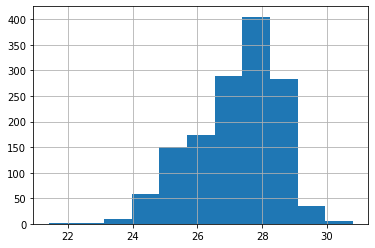

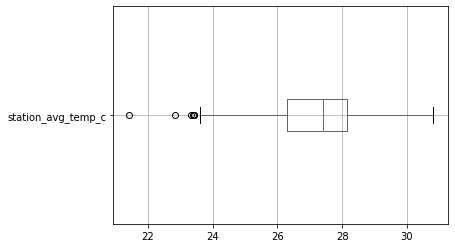

--------------------
station_diur_temp_rng_c
Moyenne:
 8.059328008627118
Mediane:
 7.3
Mode:
 6.18571428571
Variance:
 4.5275937462930544
Ecart-type:
 2.127814311986141


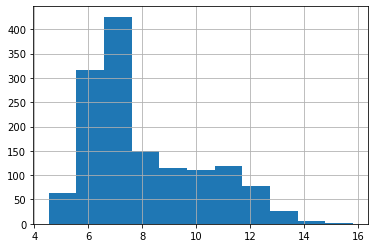

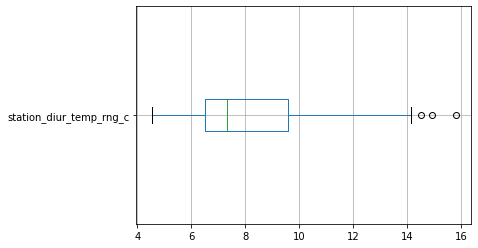

--------------------
station_max_temp_c
Moyenne:
 32.452437325905315
Mediane:
 32.8
Mode:
 32.8
Variance:
 3.8362545051248618
Ecart-type:
 1.9586358786473972


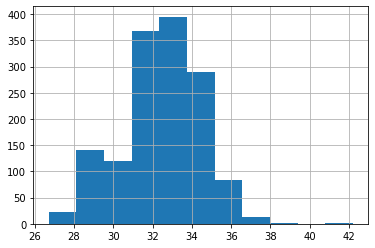

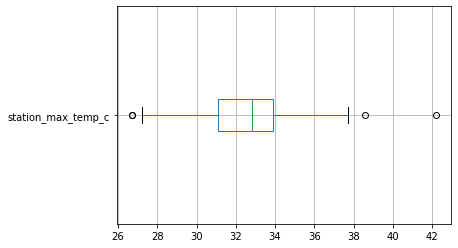

--------------------
station_min_temp_c
Moyenne:
 22.102149791955657
Mediane:
 22.2
Mode:
 23.9
Variance:
 2.4759662521809376
Ecart-type:
 1.5735203373903173


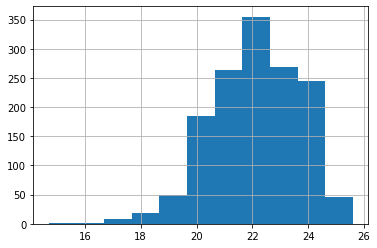

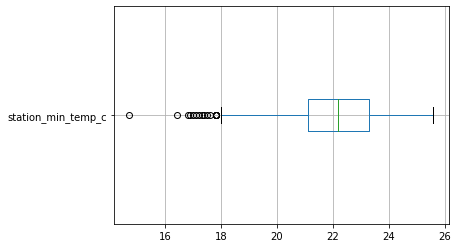

--------------------
station_precip_mm
Moyenne:
 39.32635983263596
Mediane:
 23.85
Mode:
 0.0
Variance:
 2250.4364181299366
Ecart-type:
 47.4387649304863


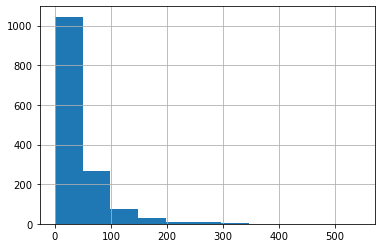

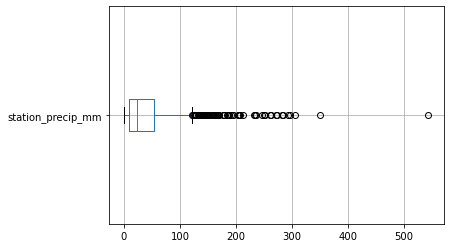

In [27]:
for var in v_quant_cont:
    print("-"*20)
    print(var)    
    print("Moyenne:\n",X[var].mean())
    print("Mediane:\n",X[var].median())
    print("Mode:\n",X[var].mode()[0])
    print("Variance:\n",X[var].var(ddof=0))
    print("Ecart-type:\n",X[var].std(ddof=0))
    X[var].hist(bins=11)
    plt.show()
    X.boxplot(column=var, vert=False)
    plt.show()

--------------------
total_cases
Moyenne:
 24.67513736263736
Mediane:
 12.0
Mode:
 0
Variance:
 1899.3058653657388
Ecart-type:
 43.58102643772561


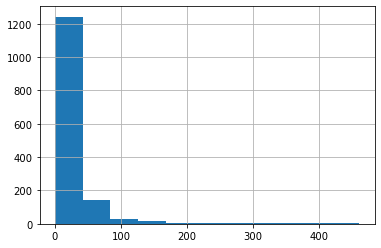

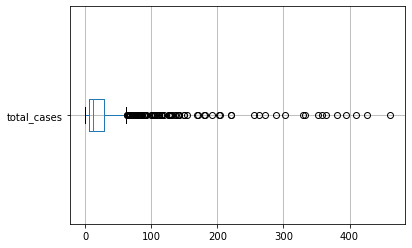

In [28]:
for var in v_quant_disc:
    print("-"*20)
    print(var)    
    print("Moyenne:\n",X[var].mean())
    print("Mediane:\n",X[var].median())
    print("Mode:\n",X[var].mode()[0])
    print("Variance:\n",X[var].var(ddof=0))
    print("Ecart-type:\n",X[var].std(ddof=0))
    X[var].hist(bins=11)
    plt.show()
    X.boxplot(column=var, vert=False)
    plt.show()

### les mesures de forme 
**skewness empirique** (mesure d'asymetrie) Ceci est équivalent à savoir si la majorité des valeurs est plus petite ou plus grande que la moyenne.
- Si γ1=0 : alors la distribution est symétrique.

- Si γ1>0 : alors la distribution est étalée à droite.

- Si γ1<0 : alors la distribution est étalée à gauche.


**Le kurtosis empirique** n'est pas une mesure d'asymétrie, mais c'est une mesure d'aplatissement. L’aplatissement peut s’interpréter à la condition que la distribution soit symétrique. En fait, on compare l'aplatissement par rapport à la distribution la plus célèbre, appelée distribution normale (parfois "courbe de Gauss" ou "Gaussienne").

- Si γ2=0, alors la distribution a le même aplatissement que la distribution normale.

- Si γ2>0, alors elle est moins aplatie que la distribution normale : les observations sont plus concentrées.

- Si γ2<0, alors les observations sont moins concentrées : la distribution est plus aplatie.

In [29]:
for var in v_quant_cont:
    print("-"*20)
    print(var)    
    print("skw:\n",X[var].skew())
    print("kur:\n",X[var].kurtosis())

--------------------
ndvi_ne
skw:
 -0.11084122784375089
kur:
 -0.13395809125871905
--------------------
ndvi_nw
skw:
 -0.008168361413407878
kur:
 0.059835168977599995
--------------------
ndvi_se
skw:
 0.5733772074431962
kur:
 0.5753176263591517
--------------------
ndvi_sw
skw:
 0.7549521340316833
kur:
 0.710497941976437
--------------------
precipitation_amt_mm
skw:
 1.7374488644431607
kur:
 6.780028321644172
--------------------
reanalysis_air_temp_k
skw:
 -0.08105671182952809
kur:
 -0.681686410047329
--------------------
reanalysis_avg_temp_k
skw:
 -0.18954400079100284
kur:
 -0.5299515604267415
--------------------
reanalysis_dew_point_temp_k
skw:
 -0.7214286743357328
kur:
 -0.11000481349570501
--------------------
reanalysis_max_air_temp_k
skw:
 0.8473253058794551
kur:
 -0.18607663526001827
--------------------
reanalysis_min_air_temp_k
skw:
 -0.6735189100357343
kur:
 -0.20950788853285873
--------------------
reanalysis_precip_amt_kg_per_m2
skw:
 3.384061331199604
kur:
 22.2339835

In [30]:
for var in v_quant_disc:
    print("-"*20)
    print(var)    
    print("skw:\n",X[var].skew())
    print("kur:\n",X[var].kurtosis())

--------------------
total_cases
skw:
 5.273849692657031
kur:
 36.51253012179685


### Les mesures de concentration

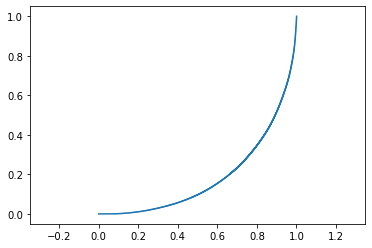

In [31]:
import numpy as np

n = len(X['total_cases'])
lorenz = np.cumsum(np.sort(X['total_cases'])) / X['total_cases'].sum()
lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0

plt.axes().axis('equal')
xaxis = np.linspace(0-1/n,1+1/n,n+1) #Il y a un segment de taille n pour chaque individu, plus 1 segment supplémentaire d'ordonnée 0. Le premier segment commence à 0-1/n, et le dernier termine à 1+1/n.
plt.plot(xaxis,lorenz,drawstyle='steps-post')
plt.show()

In [32]:
AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n # Surface sous la courbe de Lorenz. Le premier segment (lorenz[0]) est à moitié en dessous de 0, on le coupe donc en 2, on fait de même pour le dernier segment lorenz[-1] qui est à moitié au dessus de 1.
S = 0.5 - AUC # surface entre la première bissectrice et le courbe de Lorenz
gini = 2*S
gini

0.6296249346584053

In [33]:
np.var([1,4,1,4,1,4,1,4])

2.25

## Analyse bivariée

In [42]:
# Scatteur par rapport a la target 
import seaborn as sns
import scipy.stats as st

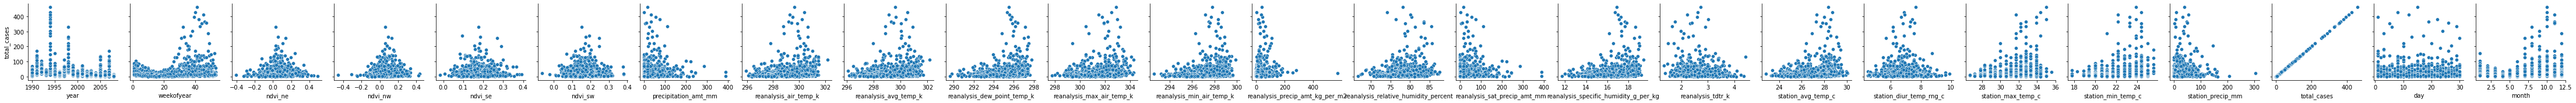

In [41]:
g = sns.PairGrid(X_sj, y_vars=["total_cases"])
g.map(sns.scatterplot)
#Scatterplot 2 var quantitative
#Tableau de contingence : 2 qualitative

### Correlation entre : 

In [36]:
v_quant_cont

['ndvi_ne',
 'ndvi_nw',
 'ndvi_se',
 'ndvi_sw',
 'precipitation_amt_mm',
 'reanalysis_air_temp_k',
 'reanalysis_avg_temp_k',
 'reanalysis_dew_point_temp_k',
 'reanalysis_max_air_temp_k',
 'reanalysis_min_air_temp_k',
 'reanalysis_precip_amt_kg_per_m2',
 'reanalysis_relative_humidity_percent',
 'reanalysis_sat_precip_amt_mm',
 'reanalysis_specific_humidity_g_per_kg',
 'reanalysis_tdtr_k',
 'station_avg_temp_c',
 'station_diur_temp_rng_c',
 'station_max_temp_c',
 'station_min_temp_c',
 'station_precip_mm']

In [38]:
v_quant_disc

['total_cases']

#### 2 variables quantitatives

In [45]:
#drop NaN
X_sj_na = X_sj.dropna(axis=0)

--------------------
Corrélation : total_cases ~  ndvi_ne
Coeff. de corrélation linéaire (-1:1):
 0.0315333926231455
Covariance empirique:
 0.12190938028410538
Coefficient de déter (R²):
 0.000994354850325447


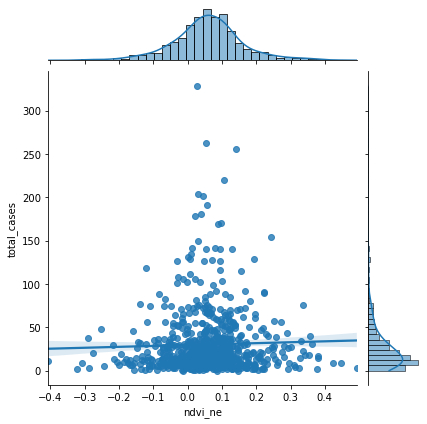

--------------------
Corrélation : total_cases ~  ndvi_nw
Coeff. de corrélation linéaire (-1:1):
 0.08330491610767218
Covariance empirique:
 0.27981463333256457
Coefficient de déter (R²):
 0.0069397090477063


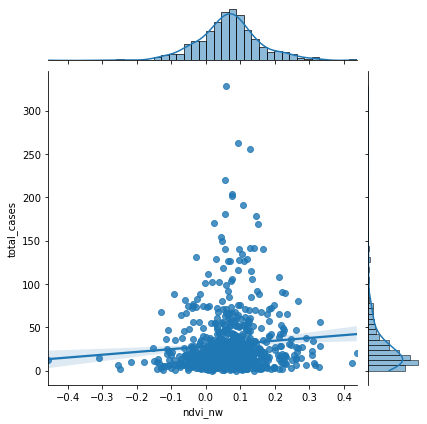

--------------------
Corrélation : total_cases ~  ndvi_se
Coeff. de corrélation linéaire (-1:1):
 -0.00438799756794462
Covariance empirique:
 -0.008983800248141584
Coefficient de déter (R²):
 1.9254522656287904e-05


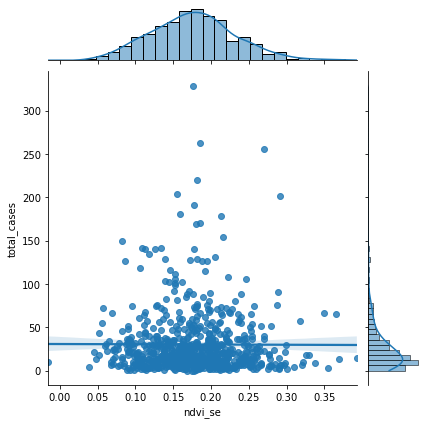

--------------------
Corrélation : total_cases ~  ndvi_sw
Coeff. de corrélation linéaire (-1:1):
 -0.0023353924157712347
Covariance empirique:
 -0.004771769872041095
Coefficient de déter (R²):
 5.454057735641803e-06


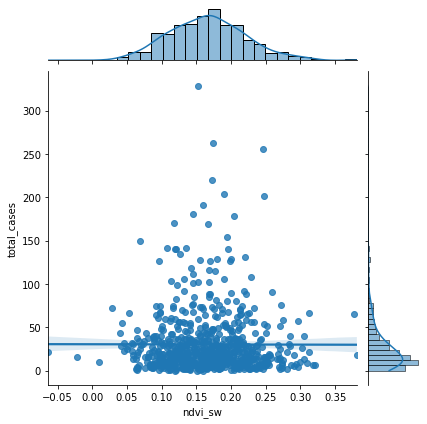

--------------------
Corrélation : total_cases ~  precipitation_amt_mm
Coeff. de corrélation linéaire (-1:1):
 0.10103345759180365
Covariance empirique:
 160.89869961723957
Coefficient de déter (R²):
 0.010207759552954788


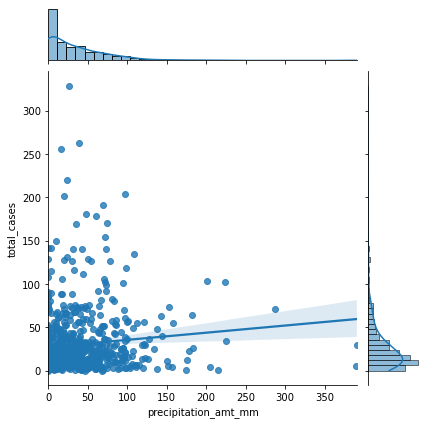

--------------------
Corrélation : total_cases ~  reanalysis_air_temp_k
Coeff. de corrélation linéaire (-1:1):
 0.23873086492167211
Covariance empirique:
 10.644300829518697
Coefficient de déter (R²):
 0.056992425866249655


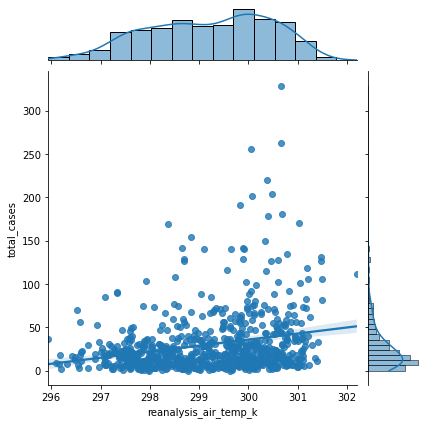

--------------------
Corrélation : total_cases ~  reanalysis_avg_temp_k
Coeff. de corrélation linéaire (-1:1):
 0.231786509195545
Covariance empirique:
 10.2030789638313
Coefficient de déter (R²):
 0.053724985845056465


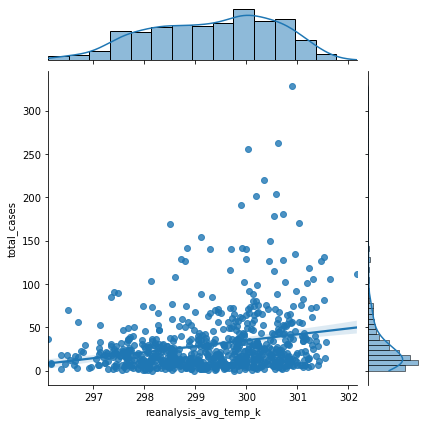

--------------------
Corrélation : total_cases ~  reanalysis_dew_point_temp_k
Coeff. de corrélation linéaire (-1:1):
 0.27197511300593136
Covariance empirique:
 15.316740200490317
Coefficient de déter (R²):
 0.07397046209458913


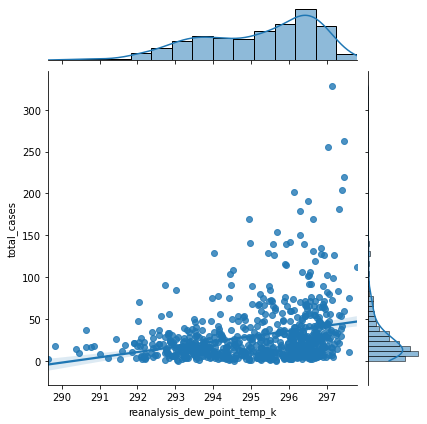

--------------------
Corrélation : total_cases ~  reanalysis_max_air_temp_k
Coeff. de corrélation linéaire (-1:1):
 0.25610368755396357
Covariance empirique:
 11.619494294542031
Coefficient de déter (R²):
 0.0655890987787382


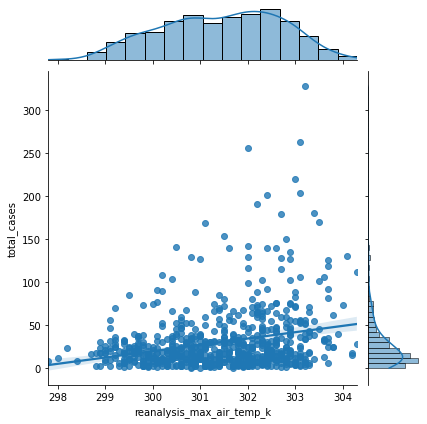

--------------------
Corrélation : total_cases ~  reanalysis_min_air_temp_k
Coeff. de corrélation linéaire (-1:1):
 0.24308090627065357
Covariance empirique:
 11.329292243188187
Coefficient de déter (R²):
 0.059088326993362264


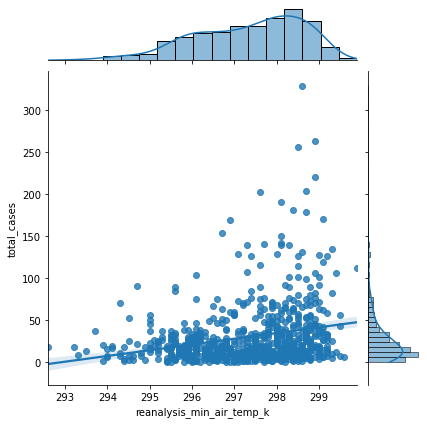

--------------------
Corrélation : total_cases ~  reanalysis_precip_amt_kg_per_m2
Coeff. de corrélation linéaire (-1:1):
 0.15495318974704364
Covariance empirique:
 197.6486476995586
Coefficient de déter (R²):
 0.02401049101278331


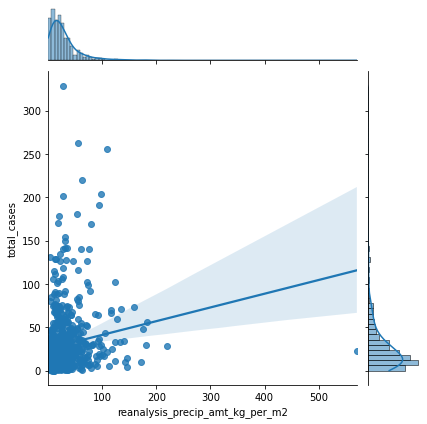

--------------------
Corrélation : total_cases ~  reanalysis_relative_humidity_percent
Coeff. de corrélation linéaire (-1:1):
 0.1973296631233412
Covariance empirique:
 23.87227916136271
Coefficient de déter (R²):
 0.038938995948371316


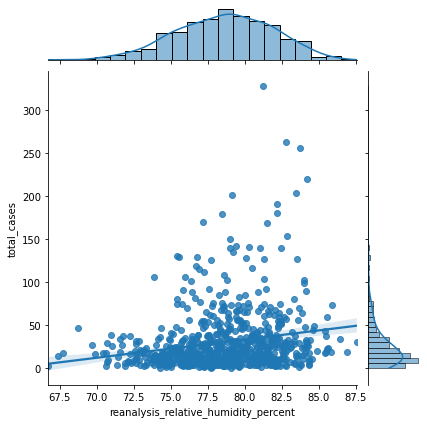

--------------------
Corrélation : total_cases ~  reanalysis_sat_precip_amt_mm
Coeff. de corrélation linéaire (-1:1):
 0.10103345759180365
Covariance empirique:
 160.89869961723957
Coefficient de déter (R²):
 0.010207759552954788


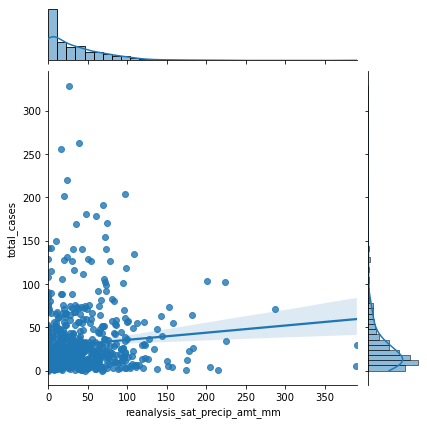

--------------------
Corrélation : total_cases ~  reanalysis_specific_humidity_g_per_kg
Coeff. de corrélation linéaire (-1:1):
 0.2803656719196823
Covariance empirique:
 15.693381387560652
Coefficient de déter (R²):
 0.07860490999097494


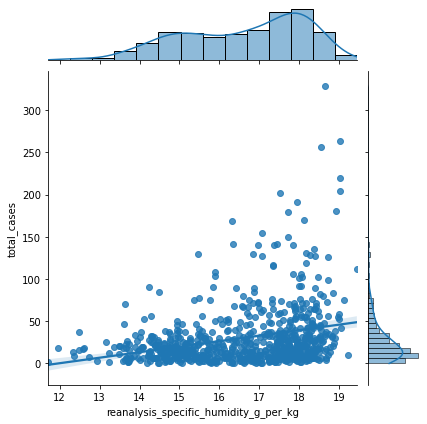

--------------------
Corrélation : total_cases ~  reanalysis_tdtr_k
Coeff. de corrélation linéaire (-1:1):
 -0.04904621368536344
Covariance empirique:
 -0.8885313496768957
Coefficient de déter (R²):
 0.002405531076870332


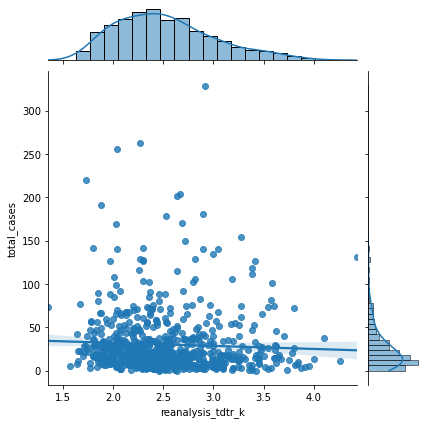

--------------------
Corrélation : total_cases ~  station_avg_temp_c
Coeff. de corrélation linéaire (-1:1):
 0.22452423686455253
Covariance empirique:
 11.478451540482252
Coefficient de déter (R²):
 0.050411132939609686


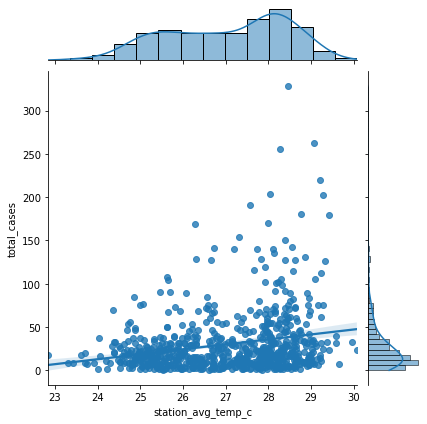

--------------------
Corrélation : total_cases ~  station_diur_temp_rng_c
Coeff. de corrélation linéaire (-1:1):
 0.010370823166924182
Covariance empirique:
 0.30693371872652947
Coefficient de déter (R²):
 0.00010755397315961133


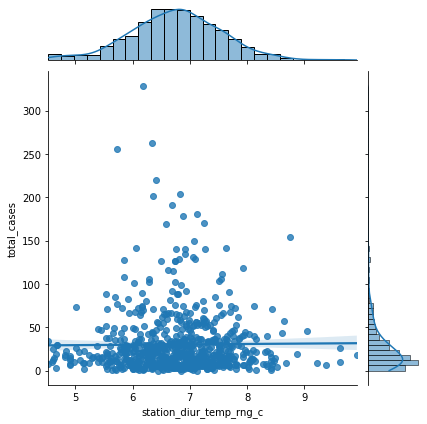

--------------------
Corrélation : total_cases ~  station_max_temp_c
Coeff. de corrélation linéaire (-1:1):
 0.17078133167339488
Covariance empirique:
 10.457725309301852
Coefficient de déter (R²):
 0.02916626324813811


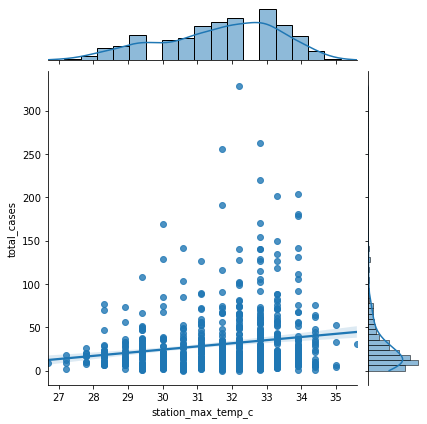

--------------------
Corrélation : total_cases ~  station_min_temp_c
Coeff. de corrélation linéaire (-1:1):
 0.21587200471618762
Covariance empirique:
 11.713257739878035
Coefficient de déter (R²):
 0.04660072242018573


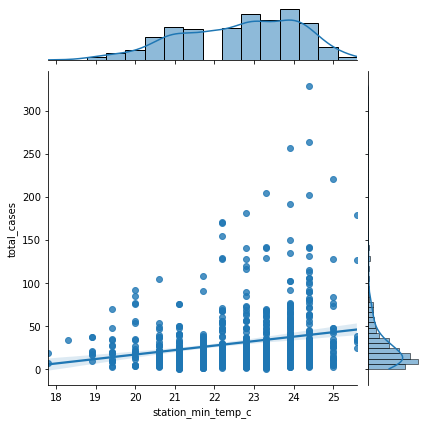

--------------------
Corrélation : total_cases ~  station_precip_mm
Coeff. de corrélation linéaire (-1:1):
 0.06994182998190313
Covariance empirique:
 67.78093160450986
Coefficient de déter (R²):
 0.004891859581217443


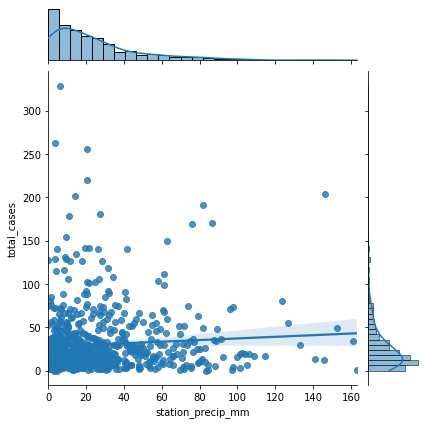

In [67]:
# Graphique : scatterplot, allez plus loin (boite a moustache ou l'autre)
#indicateur numérique
for var in v_quant_cont:
    print("-"*20)
    print('\033[1m'+f'Corrélation : total_cases ~  {var}'+'\033[0m')   
    coef_corr = st.pearsonr(X_sj_na[var],X_sj_na['total_cases'])[0]
    print("Coeff. de corrélation linéaire (-1:1):\n",coef_corr)
    print("Covariance empirique:\n",np.cov(X_sj_na[var],X_sj_na['total_cases'],ddof=0)[1,0])
    print("Coefficient de déter (R²):\n",pow(coef_corr,2))
    
    sns.jointplot(data=X_sj_na, x=var, y='total_cases', kind="reg")
    plt.show()
    #plt.plot(X_sj_na[var],X_sj_na['total_cases'],'o',alpha=0.5)
    #plt.xlabel("total_cases")
    #plt.ylabel(var)
    
    
    #X[var].hist(bins=11)
    #plt.show()
    #X.boxplot(column=var, vert=False)
    #plt.show()

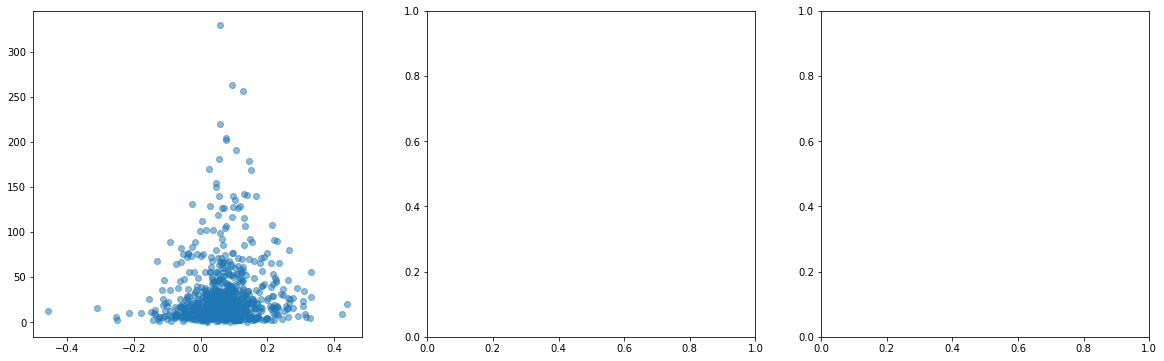

In [68]:
#si le temps le permet
plt.figure(figsize=(20,6))
plt.subplot(131)
plt.plot(X_sj_na['ndvi_nw'],X_sj_na['total_cases'],'o',alpha=0.5)

plt.subplot(132)


plt.subplot(133)


plt.show()

#### Analyser une variable quantitative et une qualitative par ANOVA

In [77]:
import pingouin as pg
v_qual_nomi

ModuleNotFoundError: No module named 'pingouin'

In [70]:
v_qual_ordi

['year', 'weekofyear', 'week_start_date', 'day', 'month']

In [81]:
def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
    #.01 ~ small
    #.06 ~ medium
    #.14 ~ large

--------------------
Corrélation : total_cases ~  year
eta squared (0:1):
 0.3523114379106877


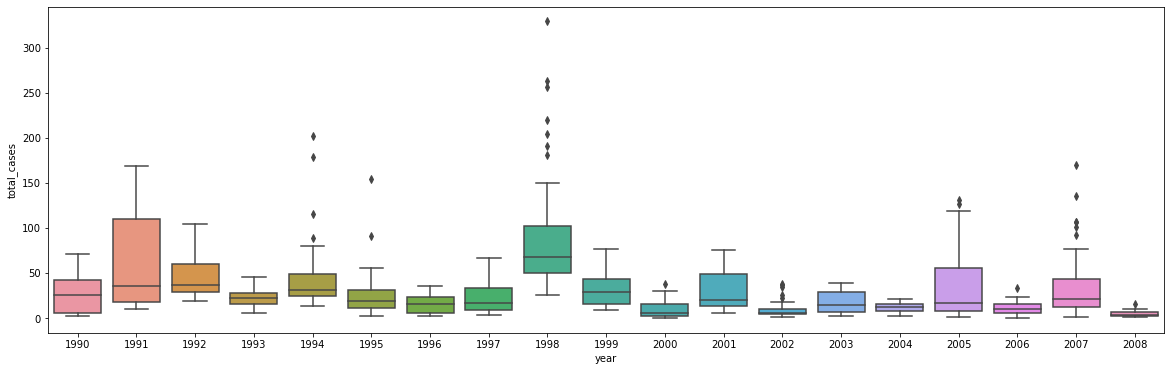

--------------------
Corrélation : total_cases ~  weekofyear
eta squared (0:1):
 0.19309113455648944


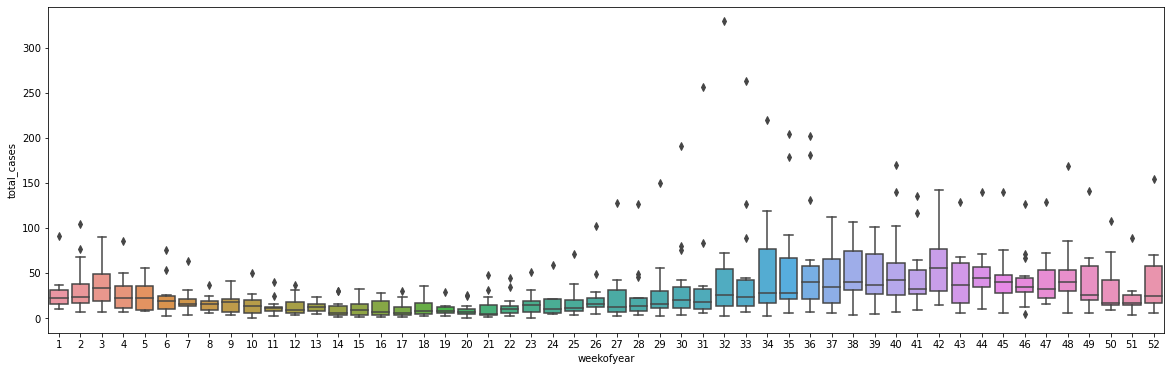

--------------------
Corrélation : total_cases ~  month
eta squared (0:1):
 0.17696879331664606


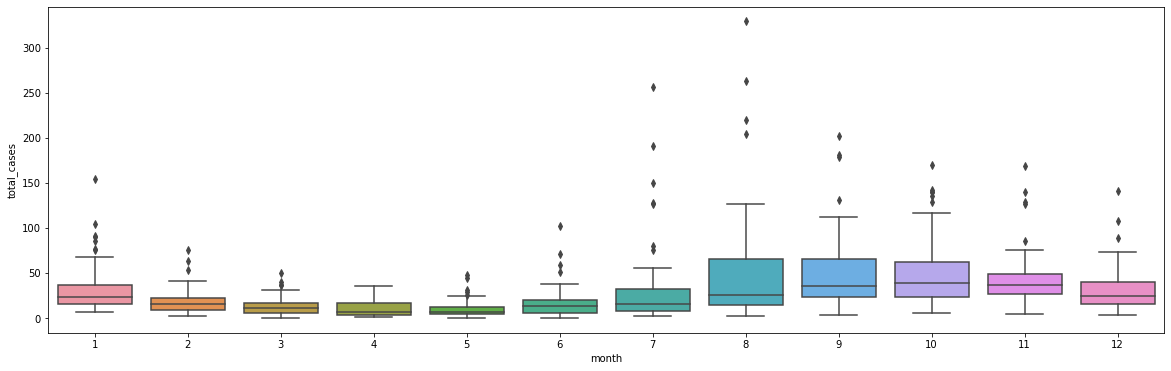

In [82]:
for var in ['year', 'weekofyear', 'month']:
    print("-"*20)
    print('\033[1m'+f'Corrélation : total_cases ~  {var}'+'\033[0m')   
    eta_s = eta_squared(X_sj_na[var],X_sj_na['total_cases'])
    print("eta squared (0:1):\n",eta_s)

    plt.figure(figsize=(20,6))
    sns.boxplot(data=X_sj_na, x=var, y='total_cases')
    plt.show()

In [83]:
# deux variable qualitatif (inutile)

Dans ces 4 derniers chapitres précédents, nous avons vu les mesures r2 , η2 et ξn

. Ce sont tous des nombres qui nous donnent une indication sur la corrélation (ou au contraire sur l'indépendance) de deux variables.

Mais quand vous avez un r2
ou un η2

égal à 0.4 (qui n'est ni proche de 0 ni de 1), peut-être avez-vous ressenti la frustration de dire "Bon oui certes, c'est un peu corrélé, mais pas trop non plus...". N'écrivez jamais cette phrase dans un rapport d'analyse de données !

En fait, il existe des seuils que l'on peut calculer. En dessous du seuil, on dira "Les variables ne sont pas corrélées", et au dessus, on dira l'inverse.

C'est bien plus pratique ! Mais pour être tout à fait précis, il faut donner une précision supplémentaire, qui est une sorte de "niveau de certitude", que l'on appelle degré de significativité. On utilise pour cela la p-value, exprimée en pourcentage.

C'est grâce à elle que l'on peut dire si un test statistique est significatif ou pas.

Ces notions de test statistique, de degré de significativité et de p-value font partie du domaine des statistiques inférentielles.


#### Les valeurs manquantes, les outliers et les doublons

In [91]:
features.isna().sum()

city                                       0
year                                       0
weekofyear                                 0
week_start_date                            0
ndvi_ne                                  194
ndvi_nw                                   52
ndvi_se                                   22
ndvi_sw                                   22
precipitation_amt_mm                      13
reanalysis_air_temp_k                     10
reanalysis_avg_temp_k                     10
reanalysis_dew_point_temp_k               10
reanalysis_max_air_temp_k                 10
reanalysis_min_air_temp_k                 10
reanalysis_precip_amt_kg_per_m2           10
reanalysis_relative_humidity_percent      10
reanalysis_sat_precip_amt_mm              13
reanalysis_specific_humidity_g_per_kg     10
reanalysis_tdtr_k                         10
station_avg_temp_c                        43
station_diur_temp_rng_c                   43
station_max_temp_c                        20
station_mi